In [1]:
# install these by running the command 
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# To Avoid OOM out of memory error 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , true)

In [4]:
tf.config.list_physical_devices('GPU') # no graphics card ;/

[]

In [5]:
import cv2
import imghdr

C:\Users\kalav\AppData\Local\Temp\ipykernel_16104\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg' , 'jpg' , 'png' , 'bmp']

Function to remove dodgy Images which aren't in the above formats

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not exist in the list {} '.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {} '.format(image_path))

In [9]:
# tf.data.Dataset??

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 215 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
data_iterator 

In [14]:
batch = data_iterator.next()

In [15]:
len(batch) #images and labels

2

In [16]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

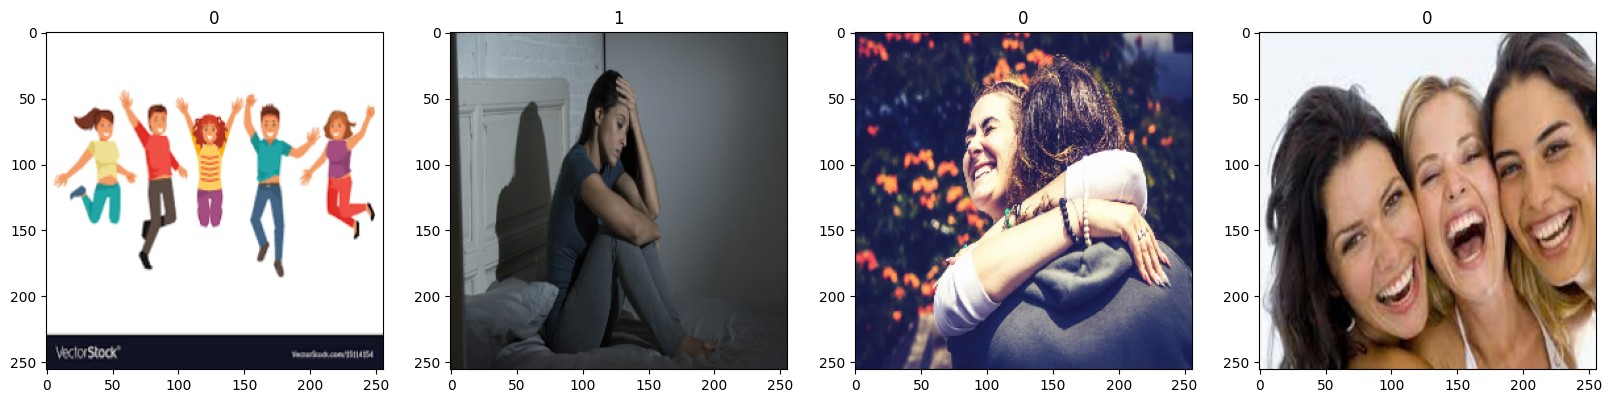

In [18]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y : (x/255 , y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

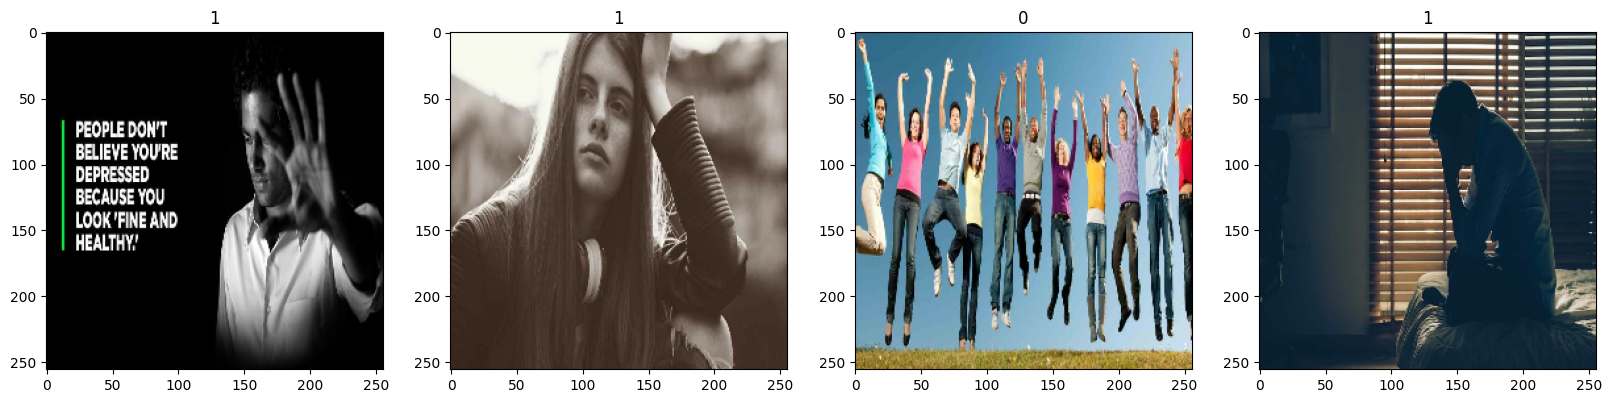

In [23]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

7

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16 , (3,3) ,1 , activation = 'relu' , input_shape = (256 , 256 , 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) ,1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3) ,1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [30]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir = 'logs'

In [33]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
hist = model.fit(train , epochs = 20 , validation_data = val , callbacks = [tensorflow_callback])

Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 1.5594 - accuracy: 0.5469 - val_loss: 1.0653 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7995 - accuracy: 0.5547 - val_loss: 0.6474 - val_accuracy: 0.5156
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6562 - accuracy: 0.5156 - val_loss: 0.6113 - val_accuracy: 0.6719
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.5680 - accuracy: 0.7266 - val_loss: 0.5178 - val_accuracy: 0.7656
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.4699 - accuracy: 0.8203 - val_loss: 0.4151 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 11s 3s/step - loss: 0.3520 - accuracy: 0.8750 - val_loss: 0.4048 - val_accuracy: 0.8281
Epoch 7/20
4/4 [==============================] - 11s 2s/step - loss: 0.3326 - accuracy: 0.8125 - val_loss: 0.2758 - val_accuracy: 0.9531
Epoch 8/20
4/4 [====================

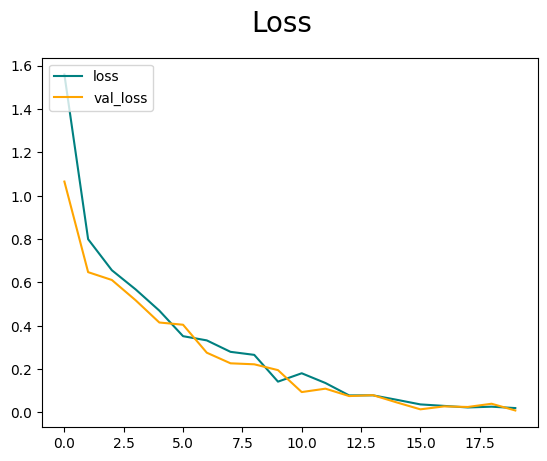

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'] , color = 'orange' , label = 'val_loss')
fig.suptitle('Loss' , fontsize = 20)
plt.legend(loc ='upper left')
plt.show()

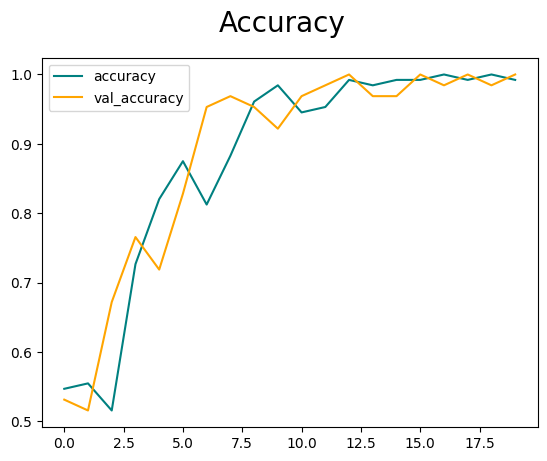

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc ='upper left')
plt.show()

In [37]:
from tensorflow.keras.metrics import Recall , BinaryAccuracy , Precision

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X , y  = batch
    yhat = model.predict(X)
    pre.update_state(y , yhat)
    re.update_state(y , yhat)
    acc.update_state(y , yhat)

1/1 [==============================] - ETA: 0s

In [ ]:
print(f'Precision : {pre.result().numpy()} Recall : {re.result().numpy()} Accuracy : {acc.result().numpy()}')

In [ ]:
img = cv2.imread('sadImage.jpeg')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img , (256 , 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
    print('The Given Image is Sad')
else:
    print('The Given Image is happy')